Problem 2c (Squaring the histogram)

* Show that this algorithm always ends. <br>
Notice that we have a finite number of buckets. When we transfer probability from bucket B to bucket A, we fill bucket A so that it's full and we can possibly make bucket B not full, but it's filled more than bucket A previously was. Combining that with a fact, that total amount of probability is exactly the amount we need to fill every bucket to its fullest we can conclude, that the algorithm will always end.

* When it ends, each bucket contains pieces of at most two $p_i$'s. <br>
At the beginning bucket can be either overflowing, be exactly full or be not full. If a bucket is exactly full, we do not perform any transfer to or from it (in the end there's only one $p_i$ in it). If a bucket is not full, we transfer probability to it from a bucket that is overflowing. We can see, that we can fill this bucket so that it is full, so in the end it will be filled with two $p_i$. Finally, if the bucket is overflowing we transfer probability from it to other buckets. If it ends up being exactly full we leave it and it has just one $p_i$ in itself, in other case we know that it is not full and it contains only one $p_i$ - that case was considered previously.

Average number of generated days in b-day paradox simulations: 24.619395819484453
CPU times: user 1.07 s, sys: 54.9 ms, total: 1.13 s
Wall time: 1.14 s


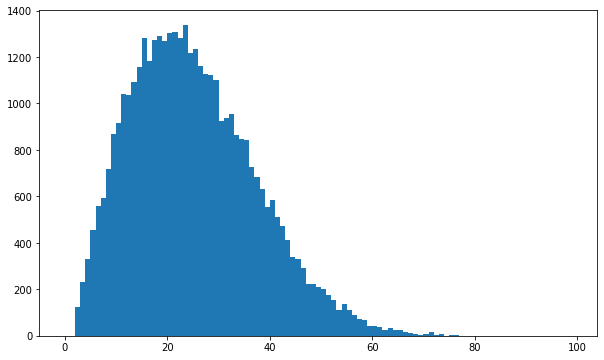

In [4]:
%%time
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

data = np.loadtxt('us_births_69_88.csv', dtype = int, skiprows = 1, delimiter=',')
data = np.transpose(data)

#creating buckets, managing cases of overflowing and not being full
def create_buckets(data):
    data_length = len(data)
    mean_probability = 1./data_length
    total_sum = np.sum(data)
    probabilities = data/total_sum
    
    q_not_full = deque()
    q_overflow = deque()
    
    for i in range(data_length):
        if probabilities[i] < mean_probability:
            q_not_full.append(i)
        elif probabilities[i] > mean_probability:
            q_overflow.append(i)
    
    buckets = np.array(probabilities)
    additional_probability = np.full(data_length, -1)
    
    while len(q_not_full) > 0 and len(q_overflow) > 0:
        not_full_index = q_not_full.pop()
        overflow_index = q_overflow.pop()
        
        additional_probability[not_full_index] = overflow_index
        amount_to_fill = mean_probability - buckets[not_full_index]
        buckets[overflow_index] -= amount_to_fill
        
        if(buckets[overflow_index] < mean_probability):
            q_not_full.append(overflow_index)
        elif(buckets[overflow_index] > mean_probability):
            q_overflow.append(overflow_index)
    
    return (buckets, additional_probability, data_length, mean_probability)
        
(buckets, additional_probability, data_length, mean_probability) = create_buckets(data[2])
    
#generating random days with given probability, used vectorizations
def random_draws(how_many_draws):
    choose_bucket = np.random.randint(data_length, size = how_many_draws, dtype = int)
    choose_probability = np.random.uniform(0, mean_probability, size = how_many_draws)
    #print(choose_bucket)
    #print(choose_probability)
    generated_draws = np.where(buckets[choose_bucket] > choose_probability, 
                               choose_bucket, additional_probability[choose_bucket])
    #print(generated_draws)
    return generated_draws

#simulating b-day paradoxes with generated random days
def simulate_birthday_paradoxes(number_of_generated_days):
    draws = random_draws(number_of_generated_days)
    birthday_paradox_cases = list()
    set_of_days = set()
    for day in draws:
        if day in set_of_days:
            birthday_paradox_cases.append(len(set_of_days) + 1)
            set_of_days = set()
        else:
            set_of_days.add(day)
    return birthday_paradox_cases

#big number of days 10^7, for 10^6 simulation works in 1 second
simulated = simulate_birthday_paradoxes(1000000)
print("Average number of generated days in b-day paradox simulations:", np.average(simulated))
plt.figure(figsize = (10, 6))
plt.hist(simulated, bins = range(100))